In [1]:
# !pip install ipynb

In [31]:
from PIL import Image, ImageDraw, ImageEnhance, ImageFont
import numpy as np
import matplotlib.pyplot as plt
import ipynb.fs.full.tools as tools
import imp 
from pylab import *
from scipy.ndimage import filters
from scipy.ndimage import measurements, morphology

In [3]:
imp.reload(tools)

<module 'ipynb.fs.full.tools' (C:\Users\User\puzzler\src\tools.ipynb)>

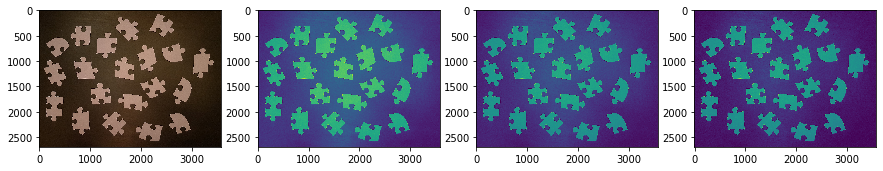

In [4]:
# Пазл монохром
origin_image_mono = np.array(Image.open("../resources/Пазл-монохром.jpg"))
tools.show_3_image(origin_image_mono)

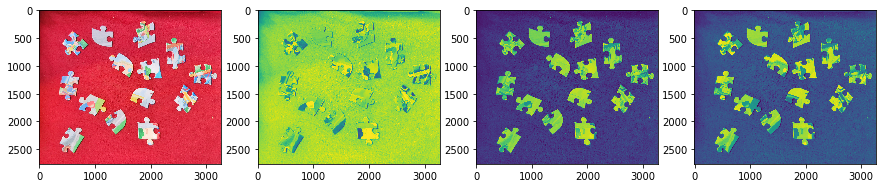

In [5]:
# Пазл Красный фон
origin_image_red = np.array(Image.open("../resources/Красный фон/Red_4.jpg"))
tools.show_3_image(origin_image_red)

#### Бинаризация

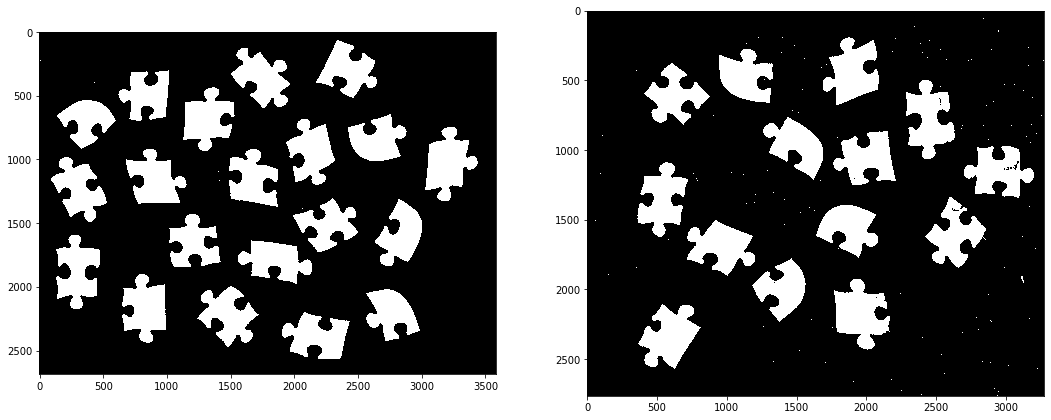

In [6]:
fig=plt.figure(figsize=(18, 18))
fig.add_subplot(1, 2, 1)
binary_image_mono = tools.binary_image(origin_image_mono, 100, 'r')
plt.imshow(binary_image_mono)
fig.add_subplot(1, 2, 2)
binary_image_red = tools.binary_image_by_summary(origin_image_red, 95)
plt.imshow(binary_image_red)
plt.show()

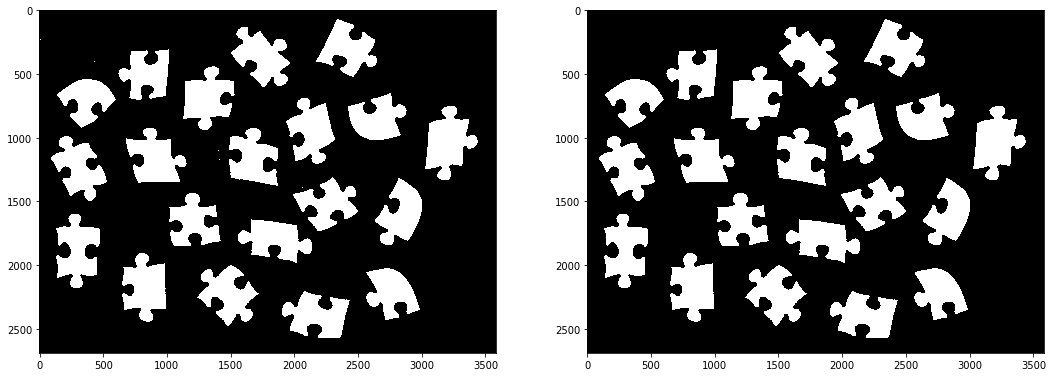

In [7]:
# Удаляем шум Первого изображения
fig=plt.figure(figsize=(18, 18))
fig.add_subplot(1, 2, 1)
plt.imshow(binary_image_mono)
fig.add_subplot(1, 2, 2)
binary_image_mono = tools.clear_image(binary_image_mono, 28)
plt.imshow(binary_image_mono)
plt.show()

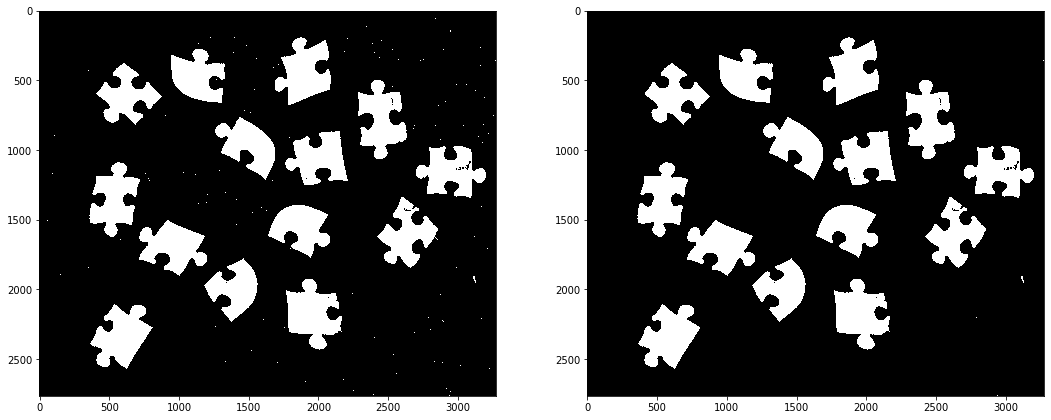

In [8]:
# Удаляем шум Второго изображения
fig=plt.figure(figsize=(18, 18))
fig.add_subplot(1, 2, 1)
plt.imshow(binary_image_red)
fig.add_subplot(1, 2, 2)
binary_image_red = tools.clear_image(binary_image_red, 28)
plt.imshow(binary_image_red)
plt.show()

#### Подсчет пазлов

In [16]:
x = 190  # столбцов
y = 200  # строк
image = np.array(binary_image_mono)
result_image = Image.fromarray(image)
draw = ImageDraw.Draw(result_image)
pix = result_image.load() 
width = image.shape[1]
height = image.shape[0]
for i in range(x, width-x, 100):
    for j in range(y, height-y, 100):
        frame = np.array([])  # рамка 350(столбцов)*400(строк) для нахождения пазлов
        for k1 in range(i-x, i+x):
            for k2 in range(j-y, j+y):
                frame = np.append(frame, pix[k1, k2][0])
        unique, counts = np.unique(frame, return_counts=True)
        counters = dict(zip(unique, counts))
        count_white = counters.get(255)
        print(counters, count_white)
        if (not not count_white and count_white > 85000):
            print('Закрашиваем область i=', i, ", j =", j)
             # находимся на белой пазле -> закрасим ее
            for k1 in range(i-x, i+x):
                for k2 in range(j-y, j+y):
                    draw.point((k1, k2), (100, 50, 200))

{0.0: 152000} None
{0.0: 152000} None
{0.0: 145827, 255.0: 6173} 6173
{0.0: 124854, 255.0: 27146} 27146
{0.0: 114574, 255.0: 37426} 37426
{0.0: 103371, 255.0: 48629} 48629
{0.0: 108155, 255.0: 43845} 43845
{0.0: 114253, 255.0: 37747} 37747
{0.0: 99175, 255.0: 52825} 52825
{0.0: 92628, 255.0: 59372} 59372
{0.0: 76543, 255.0: 75457} 75457
{0.0: 85712, 255.0: 66288} 66288
{0.0: 110876, 255.0: 41124} 41124
{0.0: 120060, 255.0: 31940} 31940
{0.0: 114194, 255.0: 37806} 37806
{0.0: 104025, 255.0: 47975} 47975
{0.0: 84721, 255.0: 67279} 67279
{0.0: 73163, 255.0: 78837} 78837
{0.0: 89365, 255.0: 62635} 62635
{0.0: 105240, 255.0: 46760} 46760
{0.0: 124738, 255.0: 27262} 27262
{0.0: 144862, 255.0: 7138} 7138
{0.0: 152000} None
{0.0: 152000} None
{0.0: 152000} None
{0.0: 140591, 255.0: 11409} 11409
{0.0: 109618, 255.0: 42382} 42382
{0.0: 93769, 255.0: 58231} 58231
{0.0: 77213, 255.0: 74787} 74787
{0.0: 87233, 255.0: 64767} 64767
{0.0: 102109, 255.0: 49891} 49891
{0.0: 89161, 255.0: 62839} 62839
{0

{0.0: 81811, 100.0: 54000, 255.0: 16189} 16189
{0.0: 97014, 100.0: 36000, 255.0: 18986} 18986
{0.0: 115899, 100.0: 18000, 255.0: 18101} 18101
{0.0: 140441, 100.0: 8000, 255.0: 3559} 3559
{0.0: 129047, 100.0: 16000, 255.0: 6953} 6953
{0.0: 112162, 100.0: 24000, 255.0: 15838} 15838
{0.0: 89354, 100.0: 32000, 255.0: 30646} 30646
{0.0: 86961, 100.0: 24000, 255.0: 41039} 41039
{0.0: 90199, 100.0: 16000, 255.0: 45801} 45801
{0.0: 88264, 100.0: 26000, 255.0: 37736} 37736
{0.0: 93072, 100.0: 36000, 255.0: 22928} 22928
{0.0: 85025, 100.0: 54000, 255.0: 12975} 12975
{0.0: 72865, 100.0: 72000, 255.0: 7135} 7135
{0.0: 81831, 100.0: 54000, 255.0: 16169} 16169
{0.0: 93076, 100.0: 36000, 255.0: 22924} 22924
{0.0: 96143, 100.0: 18000, 255.0: 37857} 37857
{0.0: 95325, 255.0: 56675} 56675
{0.0: 88242, 255.0: 63758} 63758
{0.0: 87799, 255.0: 64201} 64201
{0.0: 98603, 100.0: 8000, 255.0: 45397} 45397
{0.0: 110638, 100.0: 16000, 255.0: 25362} 25362
{0.0: 118481, 100.0: 24000, 255.0: 9519} 9519
{0.0: 114938

{0.0: 106503, 100.0: 18000, 255.0: 27497} 27497
{0.0: 119947, 255.0: 32053} 32053
{0.0: 111128, 100.0: 18000, 255.0: 22872} 22872
{0.0: 90167, 100.0: 36000, 255.0: 25833} 25833
{0.0: 70562, 100.0: 54000, 255.0: 27438} 27438
{0.0: 61923, 100.0: 72000, 255.0: 18077} 18077
{0.0: 78670, 100.0: 54000, 255.0: 19330} 19330
{0.0: 94844, 100.0: 36000, 255.0: 21156} 21156
{0.0: 115590, 100.0: 18000, 255.0: 18410} 18410
{0.0: 104908, 100.0: 28000, 255.0: 19092} 19092
{0.0: 82295, 100.0: 56000, 255.0: 13705} 13705
{0.0: 50367, 100.0: 84000, 255.0: 17633} 17633
{0.0: 21993, 100.0: 112000, 255.0: 18007} 18007
{0.0: 50675, 100.0: 84000, 255.0: 17325} 17325
{0.0: 83504, 100.0: 56000, 255.0: 12496} 12496
{0.0: 116816, 100.0: 28000, 255.0: 7184} 7184
{0.0: 132722, 255.0: 19278} 19278
{0.0: 122925, 255.0: 29075} 29075
{0.0: 119765, 255.0: 32235} 32235
{0.0: 120591, 100.0: 24000, 255.0: 7409} 7409
{0.0: 107747, 100.0: 32000, 255.0: 12253} 12253
{0.0: 105565, 100.0: 24000, 255.0: 22435} 22435
{0.0: 117097,

{0.0: 135736, 255.0: 16264} 16264
{0.0: 125735, 255.0: 26265} 26265
{0.0: 103185, 255.0: 48815} 48815
{0.0: 92454, 255.0: 59546} 59546
{0.0: 99220, 255.0: 52780} 52780
{0.0: 109221, 255.0: 42779} 42779
{0.0: 114531, 255.0: 37469} 37469
{0.0: 105197, 255.0: 46803} 46803
{0.0: 80451, 255.0: 71549} 71549
{0.0: 69086, 255.0: 82914} 82914
{0.0: 84111, 255.0: 67889} 67889
{0.0: 109860, 255.0: 42140} 42140
{0.0: 147793, 255.0: 4207} 4207
{0.0: 145959, 255.0: 6041} 6041
{0.0: 145959, 255.0: 6041} 6041
{0.0: 130099, 100.0: 18000, 255.0: 3901} 3901
{0.0: 109174, 100.0: 36000, 255.0: 6826} 6826
{0.0: 88204, 100.0: 54000, 255.0: 9796} 9796
{0.0: 66252, 100.0: 72000, 255.0: 13748} 13748
{0.0: 81676, 100.0: 54000, 255.0: 16324} 16324
{0.0: 104668, 100.0: 36000, 255.0: 11332} 11332
{0.0: 127472, 100.0: 18000, 255.0: 6528} 6528
{0.0: 142051, 255.0: 9949} 9949
{0.0: 124672, 255.0: 27328} 27328
{0.0: 104671, 255.0: 47329} 47329
{0.0: 72685, 255.0: 79315} 79315
{0.0: 58605, 255.0: 93395} 93395
Закрашивае

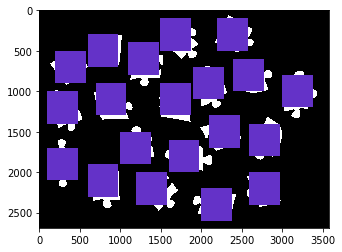

In [17]:
# for k1 in range(475-x, 475+x):
#     for k2 in range(500-y, 500+y):
#         draw.point((k1, k2), (100, 50, 200))
plt.imshow(result_image)

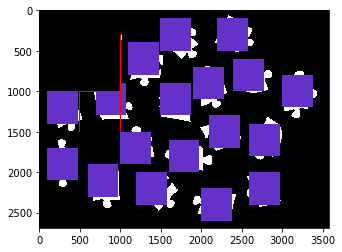

In [34]:
draw = ImageDraw.Draw(result_image)
draw.rectangle(((0, 0), (1000, 1000)), fill="black")
draw.text((20, 70), "something123")

plt.imshow(result_image)

array([  0, 255], dtype=uint8)

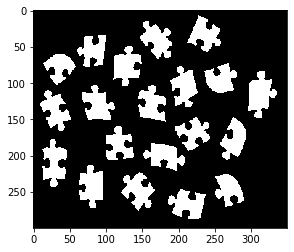

In [40]:
a = binary_image_mono
a = a.resize((350, 300))
plt.imshow(a)
a.save('a.jpg')
np.unique(np.array(a))